# Лабораторная работа №7.4
## Исследование поглощения вторичного космического излучения в веществе

In [17]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.interpolate as scpint
import scipy.odr as odr

Загрузим данные

In [18]:
dataOctober = pd.read_csv("OctoberDataPlus15.csv")
dataJanuary = pd.read_csv("JanuaryDataPlus15.csv")

Добавим к данным систематическую ошибку по x.

In [19]:
dataOctober = dataOctober.join(pd.DataFrame({'xerr':[0.5 for i in range(dataOctober.shape[0])], 'yerr':[np.sqrt(dataOctober.values[i][1]) for i in range(dataOctober.shape[0])]}))
dataJanuary = dataJanuary.join(pd.DataFrame({'xerr':[0.5 for i in range(dataJanuary.shape[0])], 'yerr':[np.sqrt(dataJanuary.values[i][1]) for i in range(dataJanuary.shape[0])]}))

In [20]:
dataOctober

,d [см],N_i [1],xerr,yerr
0,0.0,165,0.5,12.845233
1,1.9,127,0.5,11.269428
2,3.7,115,0.5,10.723805
3,5.6,116,0.5,10.770330
4,7.4,122,0.5,11.045361
5,9.2,108,0.5,10.392305
6,11.0,112,0.5,10.583005
7,12.9,115,0.5,10.723805
8,14.8,98,0.5,9.899495


In [21]:
dataJanuary

,d [см],N_i [1],xerr,yerr
0,0.0,140,0.5,11.832160
1,1.9,138,0.5,11.747340
2,3.7,139,0.5,11.789826
3,5.6,128,0.5,11.313708
4,7.4,149,0.5,12.206556
5,9.2,138,0.5,11.747340
6,11.0,111,0.5,10.535654
7,12.9,106,0.5,10.295630
8,14.8,120,0.5,10.954451
9,16.7,113,0.5,10.630146


Верхняя граница отношения интенсивностей мягкой и жесткой компонент

In [22]:
a = dataOctober.values.T[1][0] - dataOctober.values.T[1][8]
b = dataOctober.values.T[1][0]
berr = dataOctober.values.T[3][0]
res = a/b
print round(res, 2)
aerr = np.sqrt((dataOctober.values.T[3][1]/dataOctober.values.T[1][1])**2 + (dataOctober.values.T[3][8]/dataOctober.values.T[1][8])**2)
print round(res*np.sqrt((aerr/a)**2+(berr/b)**2),2)

0.41
0.03


In [23]:
a = dataJanuary.values.T[1][0] - dataJanuary.values.T[1][9]
b = dataJanuary.values.T[1][0]
berr = dataJanuary.values.T[3][0]
res = a/b
print round(res, 2)
aerr = np.sqrt((dataJanuary.values.T[3][1]/dataJanuary.values.T[1][1])**2 + (dataJanuary.values.T[3][9]/dataJanuary.values.T[1][9])**2)
print round(res*np.sqrt((aerr/a)**2+(berr/b)**2),2)

0.19
0.02


In [24]:
dataOctober["N_i [1]"] -= 97
dataJanuary["N_i [1]"] -= 105

Найдём верхнюю границу отношения интенсивностей мягкой и жесткой компонент космического излучения $\frac{I_{м}, I_{ж}}$

In [25]:
datalnOctober = pd.DataFrame({'d': dataOctober.values.T[0], 'ln(N)' : [np.log(dataOctober.values.T[1][i]) for i in range(dataOctober.shape[0])], 'xerr':dataOctober.values.T[2], 'yerr':[(dataOctober.values.T[3][i]/dataOctober.values.T[1][i]) for i in range(dataOctober.shape[0])] })
datalnJanuary = pd.DataFrame({'d': dataJanuary.values.T[0], 'ln(N)' : [np.log(dataJanuary.values.T[1][i]) for i in range(dataJanuary.shape[0])], 'xerr':dataJanuary.values.T[2], 'yerr':[(dataJanuary.values.T[3][i]/dataJanuary.values.T[1][i]) for i in range(dataJanuary.shape[0])] })
datalnOctober

,d,ln(N),xerr,yerr
0,0.0,4.219508,0.5,0.188900
1,1.9,3.401197,0.5,0.375648
2,3.7,2.890372,0.5,0.595767
3,5.6,2.944439,0.5,0.566859
4,7.4,3.218876,0.5,0.441814
5,9.2,2.397895,0.5,0.944755
6,11.0,2.708050,0.5,0.705534
7,12.9,2.890372,0.5,0.595767
8,14.8,0.000000,0.5,9.899495


In [26]:
# Функция для регрессии Деминга: https://docs.scipy.org/doc/scipy/reference/odr.html
def g(B, x):
    return B[0]*x + B[1]

linear = odr.Model(g)

/home/dmitriy/.local/lib/python2.7/site-packages/matplotlib/mathtext.py:865: MathTextWarning: Font 'default' does not have a glyph for '\u0448' [U448]
  MathTextWarning)
/home/dmitriy/.local/lib/python2.7/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)
/home/dmitriy/.local/lib/python2.7/site-packages/matplotlib/mathtext.py:865: MathTextWarning: Font 'default' does not have a glyph for '\u0442' [U442]
  MathTextWarning)


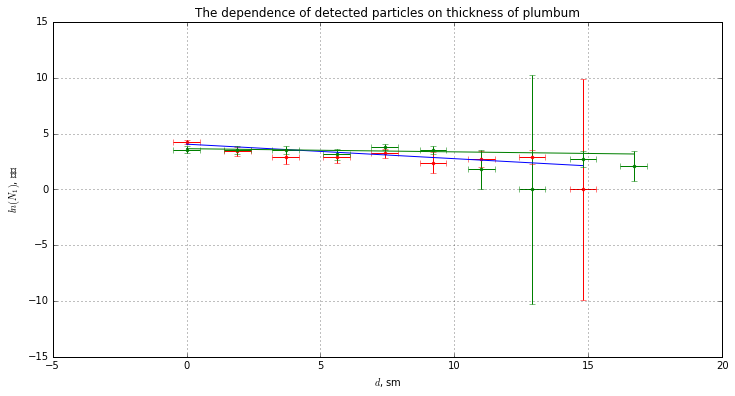

In [27]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

yDataOctober = datalnOctober.values.T[1]
xDataOctober = datalnOctober.values.T[0]
xerrDataOctober = datalnOctober.values.T[2]
yerrDataOctober = datalnOctober.values.T[3]


mydata = odr.RealData(xDataOctober, yDataOctober, sx=xerrDataOctober, sy=yerrDataOctober)
myodr = odr.ODR(mydata, linear, beta0=[1.,1.])
myoutput = myodr.run()
x_new = np.linspace(xDataOctober[0], xDataOctober[-1], 50)
y_new = linear.fcn(myoutput.beta, x_new)


plt.errorbar(xDataOctober, yDataOctober, xerr=xerrDataOctober, yerr=yerrDataOctober, fmt='r.', color='r')
plt.xlabel(u'$d$, sm')
plt.ylabel(u'$ln(N_{1})$, шт')
plt.title(u'The dependence of detected particles on thickness of plumbum')
plt.grid(True)

plt.plot(x_new, y_new, 'k',  color='b')
kOctober = myoutput.beta[0]
kerrOctober = myoutput.sd_beta[0]
bOctober = myoutput.beta[1]
berrOctober = myoutput.sd_beta[1]

#January

yDataJanuary = datalnJanuary.values.T[1]
xDataJanuary = datalnJanuary.values.T[0]
xerrDataJanuary = datalnJanuary.values.T[2]
yerrDataJanuary = datalnJanuary.values.T[3]


mydata = odr.RealData(xDataJanuary, yDataJanuary, sx=xerrDataJanuary, sy=yerrDataJanuary)
myodr = odr.ODR(mydata, linear, beta0=[1.,1.])
myoutput = myodr.run()
x_new = np.linspace(xDataJanuary[0], xDataJanuary[-1], 50)
y_new = linear.fcn(myoutput.beta, x_new)


plt.errorbar(xDataJanuary, yDataJanuary, xerr=xerrDataJanuary, yerr=yerrDataJanuary, fmt='r.', color='g')

plt.plot(x_new, y_new, 'k',  color='g')
plt.show()
kJanuary = myoutput.beta[0]
kerrJanuary = myoutput.sd_beta[0]
bJanuary = myoutput.beta[1]
berrJanuary = myoutput.sd_beta[1]

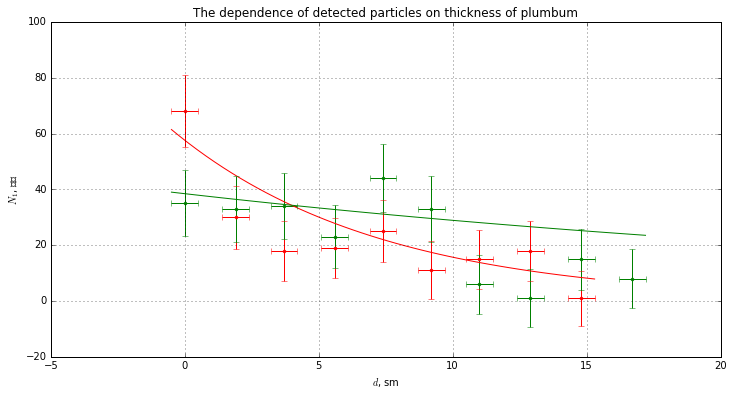

In [28]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

yDataOctober = dataOctober.values.T[1]
xDataOctober = dataOctober.values.T[0]
xerrDataOctober = dataOctober.values.T[2]
yerrDataOctober = dataOctober.values.T[3]

plt.errorbar(xDataOctober, yDataOctober, xerr=xerrDataOctober, yerr=yerrDataOctober, fmt='r.', color='r')
plt.xlabel(u'$d$, sm')
plt.ylabel(u'$N_{1}$, шт')
plt.title(u'The dependence of detected particles on thickness of plumbum')
plt.grid(True)

x_new = np.linspace(xDataOctober[0]-0.5, xDataOctober[-1]+0.5, 50)
plt.plot(x_new, np.exp(bOctober)*np.exp(kOctober*x_new), 'k',  color='r')

# January

yDataJanuary = dataJanuary.values.T[1]
xDataJanuary = dataJanuary.values.T[0]
xerrDataJanuary = dataJanuary.values.T[2]
yerrDataJanuary = dataJanuary.values.T[3]

plt.errorbar(xDataJanuary, yDataJanuary, xerr=xerrDataJanuary, yerr=yerrDataJanuary, fmt='r.', color='g')

x_new = np.linspace(xDataJanuary[0]-0.5, xDataJanuary[-1]+0.5, 50)
plt.plot(x_new, np.exp(bJanuary)*np.exp(kJanuary*x_new), 'k',  color='g')

plt.show()

Эффективная длина пробега мягкой компоненты

In [29]:
print abs(round(1.0/kOctober, 2))
print abs(round((1.0/kOctober)*kerrOctober, 2))

7.7
0.22


In [30]:
print abs(round(1.0/kJanuary, 2))
print abs(round((1.0/kJanuary)*kerrJanuary, 2))

35.04
0.92
